In [1]:
# importing Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Extracting the Data

In [2]:
# Reading the Data
def read_data():
    data=pd.read_csv("C:/Users/PC PC/Downloads/ML Tests/Data.csv")
    return data

In [3]:
# Calling the data
data=read_data()
print(data.head())

   surface  rooms_new  zipcode_new price_new   latitude  longitude
0    138.0        4.0         1060    420000  40.804673 -73.963420
1    130.0        5.0         1087    550000  52.355590   5.000561
2    116.0        5.0         1061    425000  52.373044   4.837568
3     92.0        5.0         1035    349511  52.416895   4.906767
4    127.0        4.0         1013   1050000  52.396789   4.876607


Processing the data

In [4]:
print("The number of rows and columns:",data.shape)

The number of rows and columns: (2191, 6)


In [5]:
print("The data types:",data.dtypes)

The data types: surface        float64
rooms_new      float64
zipcode_new      int64
price_new       object
latitude       float64
longitude      float64
dtype: object


In [6]:
data['zipcode_new']=pd.to_numeric(data['zipcode_new'],errors='coerce')
data['price_new']=pd.to_numeric(data['price_new'],errors='coerce')

In [7]:
data.isnull().sum()

surface         0
rooms_new      28
zipcode_new     0
price_new       9
latitude        0
longitude       0
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

surface        0
rooms_new      0
zipcode_new    0
price_new      0
latitude       0
longitude      0
dtype: int64

Exploratory Data Analysis

In [10]:
print(data.columns)

Index(['surface', 'rooms_new', 'zipcode_new', 'price_new', 'latitude',
       'longitude'],
      dtype='object')


In [11]:
print(data.describe)

<bound method NDFrame.describe of       surface  rooms_new  zipcode_new  price_new   latitude  longitude
0       138.0        4.0         1060   420000.0  40.804673 -73.963420
1       130.0        5.0         1087   550000.0  52.355590   5.000561
2       116.0        5.0         1061   425000.0  52.373044   4.837568
3        92.0        5.0         1035   349511.0  52.416895   4.906767
4       127.0        4.0         1013  1050000.0  52.396789   4.876607
...       ...        ...          ...        ...        ...        ...
2181     56.0        2.0         1068   197500.0  52.362400   4.804206
2182     70.0        2.0         1069   197500.0  52.357638   4.790123
2183     34.0        1.0         1055   174000.0  52.381707   4.854023
2184     64.0        2.0         1025   235000.0  52.399622   4.936959
2190     64.0        2.0         1025   211000.0  52.399622   4.936959

[2154 rows x 6 columns]>


In [12]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2154 entries, 0 to 2190
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   surface      2154 non-null   float64
 1   rooms_new    2154 non-null   float64
 2   zipcode_new  2154 non-null   int64  
 3   price_new    2154 non-null   float64
 4   latitude     2154 non-null   float64
 5   longitude    2154 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 117.8 KB
None


<Axes: xlabel='rooms_new', ylabel='price_new'>

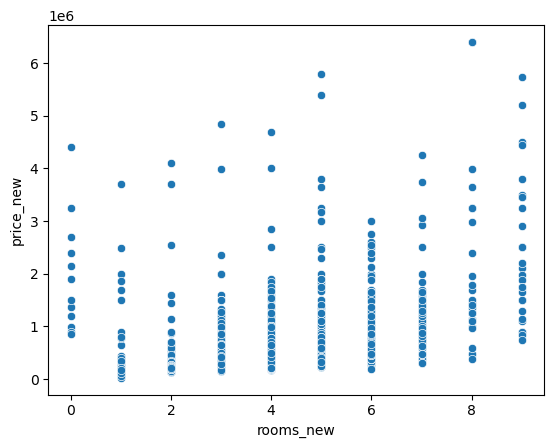

In [13]:
sns.scatterplot(x=data['rooms_new'],y=data['price_new'])

Splitting Data into Training and Testing

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X=data[['surface','rooms_new']]
y=data['price_new']

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [17]:
X_train.head(2)

,surface,rooms_new
867,74.0,3.0
1625,90.0,3.0


Multiple linear regression

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [19]:
model=LinearRegression() # create a model

In [20]:
model_train=model.fit(X_train,y_train) # Fit the moddel with training data

In [21]:
pred=model.predict(X_test) # making predictions

In [22]:
# model evaluation
mlr=r2_score(y_test,pred) 
print(mlr)

0.7593477848897446


In [23]:
print("MSE:",mean_squared_error(y_test,pred))

MSE: 95623093554.62296


In [24]:
print("Root MSE:",sqrt(mean_squared_error(y_test,pred)))

Root MSE: 309229.83936648635


In [25]:
model.coef_

array([  8272.16127782, -42605.44302441])

In [26]:
c=model.intercept_

In [27]:
m1 = model.coef_[0]
m2 = model.coef_[1]



In [28]:
x1=180
x2=4


In [30]:
Y=m1*x1+m2*x2+c
Y         # prredicting house price

1179298.1164103053

KNN Regression

In [31]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [32]:
knn_regressor=KNeighborsRegressor(n_neighbors=5)

In [33]:
knn_regressor.fit(X_train,y_train)

KNeighborsRegressor()

In [34]:
y_pred=knn_regressor.predict(X_test)

In [35]:
knnr=r2_score(y_test,pred)
print(knnr)

0.7593477848897446


In [36]:
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",mse)

Mean Squared Error: 121857482859.26395


In [37]:
print("Root MSE:",sqrt(mean_squared_error(y_test,y_pred)))

Root MSE: 349080.91162259784


In [38]:
error = []
k = []
for i in range(1,10):
    print("When K = ", i)
    model = KNeighborsRegressor(n_neighbors=i)  #### By default it is 5
    model_train = model.fit(X_train, y_train)
    print("The Model training is completed")
    err = round(1- model_train.score(X_train, y_train),2)
    error.append(err)
    k.append(i)

When K =  1
The Model training is completed
When K =  2
The Model training is completed
When K =  3
The Model training is completed
When K =  4
The Model training is completed
When K =  5
The Model training is completed
When K =  6
The Model training is completed
When K =  7
The Model training is completed
When K =  8
The Model training is completed
When K =  9
The Model training is completed


In [39]:
error


[0.1, 0.13, 0.15, 0.16, 0.16, 0.18, 0.18, 0.18, 0.19]

In [40]:
k


[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [41]:
df = pd.DataFrame({'K':k,'Error':error})

<Axes: xlabel='K', ylabel='Error'>

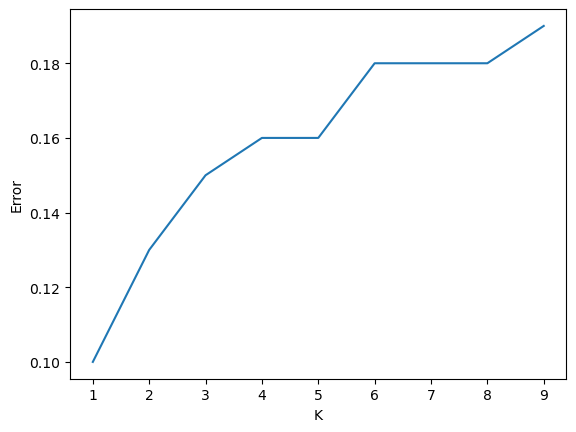

In [42]:
sns.lineplot(x = 'K', y = 'Error', data = df)

In [43]:
###### How to Save the Model
import joblib

In [44]:
joblib.dump(model,'KNN_Reg.sav')

['KNN_Reg.sav']